In [1]:
using Pkg
Pkg.activate("JMPE")

  Activating project at `~/Desktop/Map-Project/JMPE`


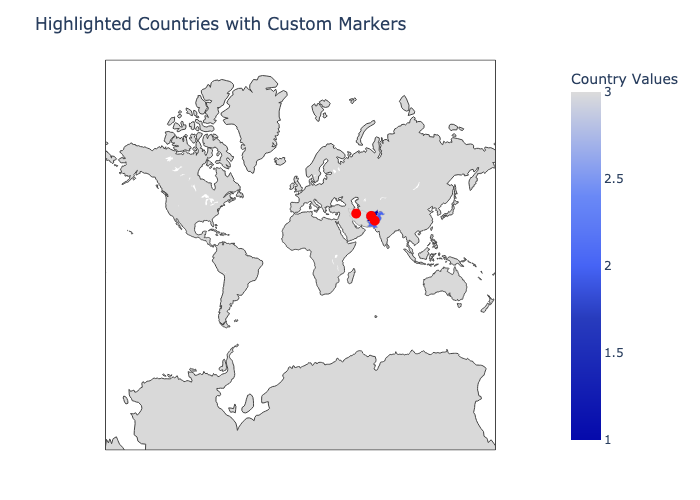

In [2]:
using PlotlyJS

# Define countries and their display information
countries = ["Afghanistan", "Pakistan", "Iran"]
values = [1, 2, 3]  # Values corresponding to each country (e.g., population, GDP)

# Create a choropleth map using country names
choropleth_trace = choropleth(
    locations=countries,  # Country names or ISO-3 codes
    z=values,  # Values to display for each country
    locationmode="country names",  # Use country names instead of ISO codes
    colorscale="Blues",
    marker=attr(line=attr(color="rgb(180,180,180)", width=0.5)),
    colorbar_title="Country Values"
)

# Define specific locations with HTML-formatted text for the popups
locations = [
    (
        65.2, 33.9, 
        "<b>Kabul</b><br>Capital of Afghanistan.<br>" *
        "<img src='https://example.com/kabul.jpg' width='100' height='75'>"
    ),
    (
        68.5, 30.2, 
        "<b>Islamabad</b><br>Capital of Pakistan.<br>" *
        "<img src='https://example.com/islamabad.jpg' width='100' height='75'>"
    ),
    (
        51.4, 35.7, 
        "<b>Tehran</b><br>Capital of Iran.<br>" *
        "<img src='https://example.com/tehran.jpg' width='100' height='75'>"
    )
]

# Create a trace for the locations with markers and HTML-based text boxes
marker_trace = scattergeo(
    lon=[loc[1] for loc in locations],
    lat=[loc[2] for loc in locations],
    text=[loc[3] for loc in locations],
    mode="markers",
    marker=attr(size=10, color="red", symbol="circle"),
    name="Important Locations",
    hoverinfo="text"  # Show only the HTML-formatted text when hovering
)

# Define the layout of the map
layout = Layout(
    title="Highlighted Countries with Custom Markers",
    geo=attr(
        projection_type="mercator",
        showland=true,
        landcolor="rgb(217, 217, 217)",
        countrycolor="rgb(204, 204, 204)"
    )
)

# Combine the choropleth and marker traces and render the map
plot([choropleth_trace, marker_trace], layout)